In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Fetching Label Names
labels=list()
path='/content/drive/MyDrive/rpf project/Dataset'
os.listdir(path)
for i in os.listdir(path):
    if len(os.listdir(os.path.join(path,i))) >0:
      labels.append(i)

In [ ]:
labels

['Warrior2', 'Tree', 'Plank', 'Goddess', 'Downdog']

In [ ]:
## Counting the Samples
Total_sample=0
for i in labels:
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :Warrior2= 198
Length of :Tree= 198
Length of :Plank= 197
Length of :Goddess= 199
Length of :Downdog= 196
Total Samples:988


In [ ]:
!pip install tqdm
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
img_size=170     # 170x170
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+'/'+img)):
        if i<300:
            img_file=imread(path+'/'+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

100%|██████████| 196/196 [00:05<00:00, 38.43it/s]


In [ ]:
X[0]

array([[[0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667],
        ...,
        [0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667]],

       [[0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667],
        ...,
        [0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667]],

       [[0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667],
        ...,
        [0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667],
        [0.89803922, 0.95686275, 0.86666667]],

       ...,

       [[0.96616646, 0.98965636, 0.84067627],
        [0.97276738, 0.99607076, 0.84727718],
        [0.95515878, 0

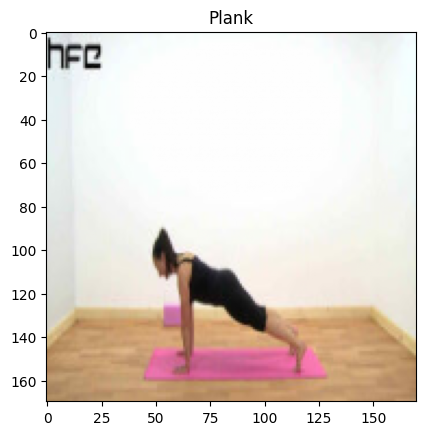

In [ ]:
plt.imshow(X[400])
plt.title(labels[Y[400]])
plt.show()

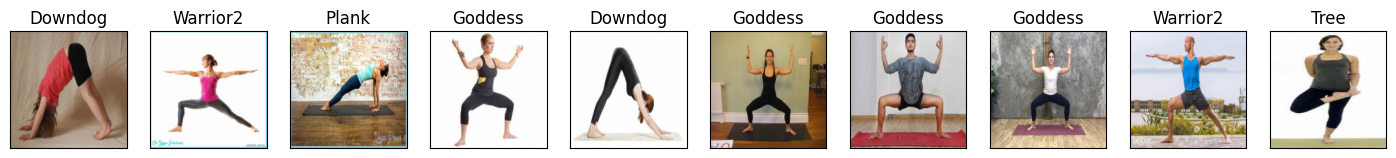

In [ ]:
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [ ]:
print('Shapes of Data Split into Train & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')

Shapes of Data Split into Train & Test Part
Training Data->(790, 170, 170, 3),(790,) Testing Data->((198, 170, 170, 3), (198,))


In [ ]:
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [ ]:
Y_train.shape,Y_test.shape

((790, 5), (198, 5))

In [ ]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(64,(5,5),padding='same',activation='relu',input_shape=(170,170,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(len(labels),activation='softmax'))  # Multi-class Classification Problem
model.compile(loss='categorical_crossentropy',optimizer='adam'
             ,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 170, 170, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 32)        32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 42, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 21, 128)      0

In [ ]:
from time import time
tic=time()
epoch=50
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=epoch,batch_size=32,verbose=1)
toc=time()
print(f'Training Time {toc-tic}')

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 0.1999 - accuracy: 0.9177

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

In [ ]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [ ]:
model.save('./Simple_CNN_model.h5')

In [ ]:
score=model.evaluate(X_test,Y_test,verbose=1)

In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

In [ ]:
Y_test=np.argmax(Y_test,axis=1)

In [ ]:
print(Y_test)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test,y_pred))

In [ ]:
print(metrics.classification_report(Y_test,y_pred))

In [ ]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 3
W = 5
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)

In [ ]:
!pip install gradio

In [ ]:

import gradio as gr

In [ ]:

def predict_image(img):
  img_4d=img.reshape(-1,170,170,3)
  prediction=model.predict(img_4d)[0]
  #return {labels[i]: float(prediction[i]) for i in range(5)}
  for i in range(len(labels)):
    if prediction[i] == 1:
      return "Predicted Class: "+labels[i]                                     

In [ ]:
image = gr.inputs.Image(shape=(170,170))

gr.Interface(fn=predict_image, inputs=image, outputs='text',title="Yoga Pose Detection").launch(debug='True')

# New section